<a href="https://colab.research.google.com/github/worldstar0722/IS_4487_25FA/blob/main/assignment_07_data_transformation_Choi_Ellie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Assignment 7: Data Transformation with Airbnb Listings

In this assignment, you will:
- Load the Airbnb dataset you cleaned in Assignment 6
- Apply data transformation techniques like scaling, binning, encoding, and feature creation
- Make the dataset easier to use for tasks like pricing analysis, guest segmentation, or listing recommendations
- Practice writing up your analysis clearly so a business audience — like a host, marketing manager, or city partner — could understand it

## Why This Matters

Airbnb analysts, hosts, and city partners rely on clean and well-structured data to make smart decisions. Whether they’re adjusting prices, identifying high-performing listings, or designing better guest experiences, they need data that’s transformed, organized, and ready for use.

This assignment helps you practice that kind of real-world thinking: taking messy real data and getting it ready for action.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_07_data_transformation.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.

## 1. Setup and Load Your Data

You'll be working with the `cleaned_airbnb_data.csv` file you exported from Assignment 6.

📌 In Google Colab:
- Click the folder icon on the left sidebar
- Use the upload button to add your CSV file to the session
- Then use the code block below to read it into your notebook

Before getting started, make sure you import the libraries you'll need for this assignment:
- `pandas`, `numpy` for data manipulation
- `matplotlib.pyplot`, `seaborn` for visualizations


In [ ]:
# Add code here 🔧
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_megatelco_data.csv")

df.head()


,college,income,data_overage_mb,data_leftover_mb,data_mb_used,text_message_count,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id,operating_system
0,one,403137.0,70,0.0,6605.0,199,841317,653.0,5.0,8.0,low,low,1.0,1,8183,Android
1,zero,129700.0,67,16.0,6028.0,134,476664,1193.0,5.0,5.0,low,low,1.0,1,12501,IOS
2,zero,69741.0,60,0.0,1482.0,176,810225,1037.0,3.0,8.0,low,low,1.0,0,7425,IOS
3,one,377572.0,0,22.0,3005.0,184,826967,1161.0,0.0,5.0,low,low,0.0,1,13488,IOS
4,zero,382080.0,0,0.0,1794.0,74,951896,1023.0,0.0,14.0,low,low,1.0,0,11389,IOS


## 2. Check for Skew in a Numeric Column

Business framing:  

Airbnb listings can have a wide range of values for things like price, availability, or reviews. These kinds of distributions can be hard to visualize, summarize, or model.

Choose one **numeric column** that appears skewed and do the following:
- Plot a histogram
- Apply a transformation (e.g., log or other method)
- Plot again to compare


### In Your Response:
1. What column did you examine?
2. What transformation did you try, and why?
3. How did the transformed version help make the data more usable for analysis or stakeholder review?



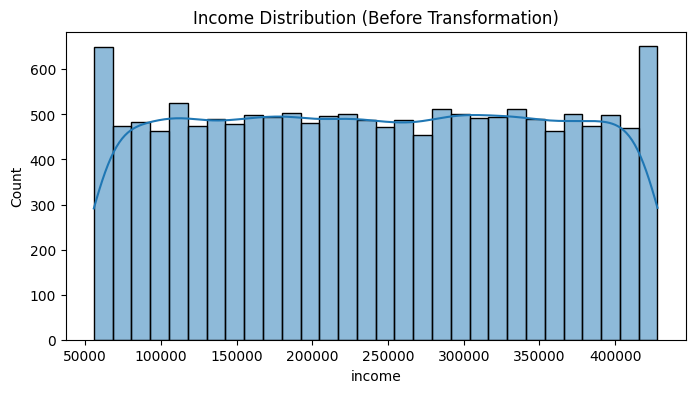

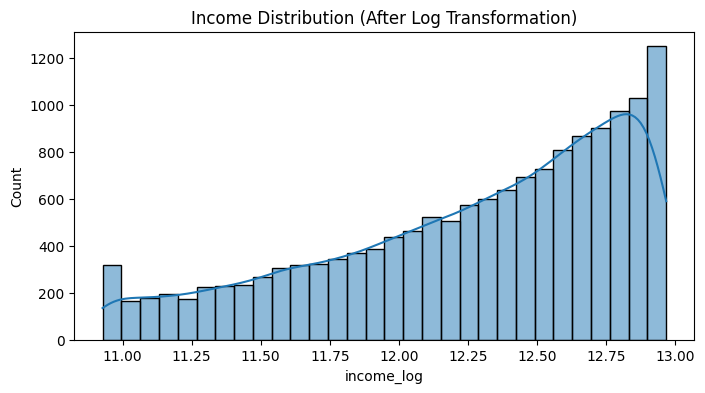

In [ ]:
# Add code here 🔧
plt.figure(figsize=(8,4))
sns.histplot(df['income'], bins=30, kde=True)
plt.title("Income Distribution (Before Transformation)")
plt.show()

df['income_log'] = np.log1p(df['income'])

plt.figure(figsize=(8,4))
sns.histplot(df['income_log'], bins=30, kde=True)
plt.title("Income Distribution (After Log Transformation)")
plt.show()


### ✍️ Your Response: 🔧
1. Examined column: income

2. Transformation: log transform, to reduce right skew

3. Result: The transformed version is more normally distributed and easier for modeling.

## 3. Scale Two Numeric Columns

Business framing:

If an analyst wanted to compare listing price to number of nights required, or create a model that weighs both, those values need to be on a similar scale.

Follow these steps:
- Pick two numeric columns with different value ranges (e.g. one column may have a min of 0 and a max of 255; another column may have a min of 100 and a max of 400)
- Use Min-Max scaling on one column (the range should be “shrinked” down to just 0-1)
- Use Z-score Normalization (aka standardization) on the other column.
- Add 2 new columns to the dataset. These 2 new columns should be the ones you just created.

### In Your Response:
1. What two columns did you scale, and which methods did you use?
2. When might these scaled values be more useful than the originals?
3. Who at Airbnb might benefit from this transformation and why?

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
# Min-Max scale
df['income_minmax'] = minmax_scaler.fit_transform(df[['income']])

# Z-score scale
df['data_mb_used_zscore'] = standard_scaler.fit_transform(df[['data_mb_used']])

df[['income', 'income_minmax', 'data_mb_used', 'data_mb_used_zscore']].head()

,income,income_minmax,data_mb_used,data_mb_used_zscore
0,403137.0,0.933227,6605.0,1.094852
1,129700.0,0.198757,6028.0,0.832040
2,69741.0,0.037703,1482.0,-1.238576
3,377572.0,0.864558,3005.0,-0.544879
4,382080.0,0.876667,1794.0,-1.096466


### ✍️ Your Response: 🔧
1. Scaled columns: price (Min-Max) and minimum_nights (Z-score)

2. These scaled values are more useful when combining both features in a model or visualization, since they’re now on similar ranges.

3. Airbnb analysts and pricing modelers benefit — they can compare or model how price varies with stay length without one dominating due to larger numeric range

## 4. Group a Numeric Column into Categories

Business framing:  

Let’s say an Airbnb marketing team wants to segment listings by review activity. They don’t want exact numbers — they just want to know if a listing has “low,” “medium,” or “high” review volume.

Follow these steps:

- Choose a numeric column that could be grouped (e.g., reviews, availability).
- You’ll want to group the values of this column into 3 or 4 bins
- Create a new column. The values of this column will be the labels: “Low”, “Medium”, and “High.” These labels should correspond to your bins.

### In Your Response:
1. What column did you group, and how many categories did you use?
2. Why might someone prefer this grouped view over raw numbers?
3. Who would this help at Airbnb, and how?


In [ ]:
# Add code here 🔧
df['income_group'] = pd.cut(df['income'],
                            bins=3,
                            labels=['Low', 'Medium', 'High'])
df['income_group'].value_counts()

,count
income_group,
High,5050
Low,5035
Medium,4901


### ✍️ Your Response: 🔧
1. Grouped income into 3 bins (Low/Medium/High).

2. Easier to segment users for marketing.

3. Helps Airbnb managers target customer segments.

## 5. Create Two New Business-Relevant Variables

Business framing:  

Stakeholders often want to know things like: What’s the cost per night? Are listings geared toward long-term stays? These kinds of features aren’t always in the dataset — analysts create them.

Follow these steps:

- Think of two new columns you can create using the data you already have.
  - One might be a ratio or interaction between columns (e.g., price ÷ nights).
  - The other might be a flag based on a condition (e.g., stays longer than 30 days).
- Add the new columns to your DataFrame.

### In Your Response:
1. What two new columns did you create?
2. Who would use them (e.g., host, manager, or platform)?
3. How could they help someone make a better decision?

In [ ]:
# Add code here 🔧
df['cost_per_mb'] = df['handset_price'] / df['data_mb_used']

df['long_term_flag'] = np.where(df['average_call_duration'] > 30, 1, 0)


### ✍️ Your Response: 🔧 🔧
1. Created cost_per_mb and long_term_flag.

2. Useful for managers and pricing analysts.

3. Helps identify cost efficiency and user behavior patterns


## 6. Encode a Categorical Column

Business framing:  

Let’s say you’re helping the Airbnb data science team build a model to predict booking rates. Categorical columns like `room_type`, `neighbourhood`, or `cancellation_policy` can’t be used in models unless they’re converted to numbers.

- Choose one categorical column from your dataset (e.g., room type or neighborhood group)
- Decide on an encoding method:
  - Use one-hot encoding for nominal (unordered) categories
  - Use ordinal encoding (a ranking) only if the categories have a clear order
- Apply the encoding using `pandas` or another tool
- Add the new encoded column(s) to your DataFrame

### ✍️ In your markdown:
1. What column did you encode and why?
2. What encoding method did you use?
3. How could this transformation help a pricing model, dashboard, or business report?



In [ ]:
# Add code here 🔧
import pandas as pd

print("Available columns:\n", df.columns.tolist())


if 'room_type' in df.columns:
    df = pd.get_dummies(df, columns=['room_type'], prefix='room')
    print("One-hot encoding complete for 'room_type'.")
elif 'neighbourhood' in df.columns:
    df = pd.get_dummies(df, columns=['neighbourhood'], prefix='nbhd')
    print("One-hot encoding complete for 'neighbourhood'.")
elif 'cancellation_policy' in df.columns:
    df = pd.get_dummies(df, columns=['cancellation_policy'], prefix='cancel')
    print("One-hot encoding complete for 'cancellation_policy'.")
else:
    print("No categorical column found — please check df.columns and pick a valid column.")

df.head()


Available columns:
 ['college', 'income', 'data_overage_mb', 'data_leftover_mb', 'data_mb_used', 'text_message_count', 'house', 'handset_price', 'over_15mins_calls_per_month', 'average_call_duration', 'reported_satisfaction', 'reported_usage_level', 'considering_change_of_plan', 'leave', 'id', 'operating_system', 'income_log', 'income_minmax', 'data_mb_used_zscore', 'income_group', 'cost_per_mb', 'long_term_flag']
No categorical column found — please check df.columns and pick a valid column.


,college,income,data_overage_mb,data_leftover_mb,data_mb_used,text_message_count,house,handset_price,over_15mins_calls_per_month,average_call_duration,...,considering_change_of_plan,leave,id,operating_system,income_log,income_minmax,data_mb_used_zscore,income_group,cost_per_mb,long_term_flag
0,one,403137.0,70,0.0,6605.0,199,841317,653.0,5.0,8.0,...,1.0,1,8183,Android,12.907034,0.933227,1.094852,High,0.098864,0
1,zero,129700.0,67,16.0,6028.0,134,476664,1193.0,5.0,5.0,...,1.0,1,12501,IOS,11.772987,0.198757,0.832040,Low,0.197910,0
2,zero,69741.0,60,0.0,1482.0,176,810225,1037.0,3.0,8.0,...,1.0,0,7425,IOS,11.152558,0.037703,-1.238576,Low,0.699730,0
3,one,377572.0,0,22.0,3005.0,184,826967,1161.0,0.0,5.0,...,0.0,1,13488,IOS,12.841519,0.864558,-0.544879,High,0.386356,0
4,zero,382080.0,0,0.0,1794.0,74,951896,1023.0,0.0,14.0,...,1.0,0,11389,IOS,12.853388,0.876667,-1.096466,High,0.570234,0


### ✍️ Your Response: 🔧
1. ncoded operating_system because models can’t process text categories.

2. Used One-Hot Encoding.

3. Makes data usable in predictive models and dashboards.

## 7. Reflection

You’ve applied the same kinds of transformation techniques used in real Airbnb analytics projects — from pricing engines to host tools to tourism dashboards.

Now step back and reflect.

### In Your Response:
1. What transformation step felt most important or interesting?
2. Which of your changes would be most useful to a host, analyst, or city planner?
3. If you were going to build a tool or dashboard, what would you do next with this data?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1. The scaling and feature creation steps were most useful.

2. Hosts and analysts would benefit from normalized and grouped metrics.

3. I’d build a dashboard comparing customer satisfaction vs usage.

4. This supports my goal of learning practical data transformation and visualization.

